# EH Mini Project - Recommender Mark 1

#### Input File  : Input File about Beer Data 
#### Output File : NA

In [3]:
# Importing Libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise        import cosine_similarity
from nltk.stem.snowball              import SnowballStemmer
from itertools                       import islice

In [4]:
# Beer Dataset Path
FILE_PATH = 'C://Users//Deshm//Downloads//'
FILE_NAME = 'BeerDataScienceProject.csv'

beer_df  = pd.read_csv(FILE_PATH+FILE_NAME, encoding='latin-1')

In [5]:
# Checking File Shape
beer_df.shape

(528870, 13)

In [6]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null float64
review_profileName    528755 non-null object
review_aroma          528870 non-null float64
review_text           528751 non-null object
review_time           528870 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


In [7]:
#beer_df.drop(['beer_beerId','beer_brewerId'], axis =1, inplace = True)
#beer_df.drop(['beer_brewerId'], axis =1, inplace = True)

In [8]:
# Converting Unix time to Readable timestamp
beer_df['Review_Timestamp'] = pd.to_datetime(beer_df['review_time'], unit='s')

In [9]:
beer_df.sort_values(by='beer_beerId').head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,Review_Timestamp
45443,NaN,3,2,Cactus Queen IPA,American IPA,4.0,4.5,4.5,4.0,MAB,4.5,"The label is very informative, except it didn'...",1047929235,2003-03-17 19:27:15
45445,NaN,3,2,Cactus Queen IPA,American IPA,3.5,4.0,4.0,4.5,Jason,4.0,Presentation: 16oz brown with no freshness dat...,1019075828,2002-04-17 20:37:08
45444,NaN,3,2,Cactus Queen IPA,American IPA,4.0,3.5,4.0,4.0,Morris729,4.0,"According to the label, this beer is dedicated...",1037795643,2002-11-20 12:34:03
45420,NaN,4,2,Wildcatter's Crude Stout,American Stout,4.0,3.5,3.5,4.0,Jason,3.5,Presentation: 16oz small bomber with a gushing...,1018003530,2002-04-05 10:45:30
45419,NaN,4,2,Wildcatter's Crude Stout,American Stout,4.0,3.5,4.0,4.0,Morris729,3.5,"According to the label, this beer is dedicated...",1037805086,2002-11-20 15:11:26


In [10]:
beer_df.drop(['review_time'], axis =1, inplace = True)

In [11]:
beer_df.nunique()

beer_ABV                 283
beer_beerId            20200
beer_brewerId           1803
beer_name              18339
beer_style               104
review_appearance         10
review_palette             9
review_overall            10
review_taste               9
review_profileName     22800
review_aroma               9
review_text           528371
Review_Timestamp      527927
dtype: int64

In [12]:
filtered_df = beer_df.dropna()

In [13]:
filtered_df.shape

(508358, 13)

### Question 1: Rank Top 3 Breweries which produce Strongest Beers

In [14]:
# Filtering out strongest beers on the basis of ABV > 7
# Domain Reference : https://www.thebeerstore.ca/beer-101/beer-types/ 
# This is a broad grouping that can describe any beer over 7% ABV. Strong beers are typically dark in colour, some are almost black. Different styles can include old ales, double IPAs, and barleywines.

df_q1 = filtered_df[filtered_df['beer_ABV'] > 7]

In [15]:
df_q1.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text',
       'Review_Timestamp'],
      dtype='object')

In [16]:
df_grouped = df_q1.groupby('beer_brewerId', sort=False)['beer_brewerId'].count().to_frame().rename(columns={'beer_brewerId': 'Count'})

In [17]:
df_grouped.sort_values(by='Count', ascending=False).head(3)

,Count
beer_brewerId,
1199,14913
3818,13097
158,11781


### Answer :  
#### As shown above BrewerId : 1199. 3818, 158 have the strongest beer

### Question 2: Which year did beers enjoy highest rating

In [18]:
filtered_df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text',
       'Review_Timestamp'],
      dtype='object')

In [19]:
filtered_df['Year'] = pd.DatetimeIndex(filtered_df['Review_Timestamp']).year

In [20]:
filtered_df.head(1)

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,Review_Timestamp,Year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,2009-02-16 20:57:03,2009


In [21]:
filtered_df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'Review_Timestamp',
       'Year'],
      dtype='object')

In [22]:
q2_df = filtered_df.groupby(['beer_name','Year'], sort=False)['review_overall'].max()

In [23]:
q2_df_new = q2_df.reset_index()

In [25]:
idx=q2_df_new.groupby(by='beer_name')['review_overall'].idxmax()

In [26]:
q2_final = q2_df_new.loc[idx,]

In [27]:
q2_final

,beer_name,Year,review_overall
31698,"""100"" Pale Ale",2009,4.0
23504,"""33"" Export",2010,3.0
22663,"""76"" Anniversary Ale",2010,4.0
22675,"""76"" Anniversary Ale With English Hops",2010,4.0
24792,"""Fade To Black"" Porter",2009,4.0
...,...,...,...
37352,Über Pils,2006,5.0
37617,ÜberFest Pilsner,2007,5.0
12465,ÜberSun (Imperial Summer Wheat Beer),2009,5.0
36235,à L'Agave Et Au Citron Vert,2010,3.5


#### Answer: The Above datafame gives you the maximum rating of beers yearwise

### Question 3: Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [28]:
filtered_df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'Review_Timestamp',
       'Year'],
      dtype='object')

In [29]:
df_q3 = filtered_df.filter(['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma'], axis=1)

In [30]:
df_q3.head()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
0,2.5,2.0,1.5,1.5,1.5
1,3.0,2.5,3.0,3.0,3.0
2,3.0,2.5,3.0,3.0,3.0
3,3.5,3.0,3.0,2.5,3.0
4,4.0,4.5,4.0,4.0,4.5


In [31]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_q3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [33]:
df_train.head()

,review_appearance,review_palette,review_overall,review_taste,review_aroma
61088,0.750,0.625,0.750,0.625,0.875
272449,0.500,0.625,0.750,0.625,0.750
411481,0.500,0.875,0.750,0.625,0.875
479839,0.750,0.875,0.875,0.750,0.875
466327,0.375,0.500,0.375,0.625,0.375


In [34]:
y_train = df_train.pop('review_overall')
x_train = df_train

In [35]:
import statsmodels.api as sm  
lm = sm.OLS(y_train,x_train).fit()

In [36]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:         review_overall   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                          4.093e+06
Date:                Tue, 28 Apr 2020   Prob (F-statistic):                        0.00
Time:                        07:41:58   Log-Likelihood:                      2.9122e+05
No. Observations:              355850   AIC:                                 -5.824e+05
Df Residuals:                  355846   BIC:                                 -5.824e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

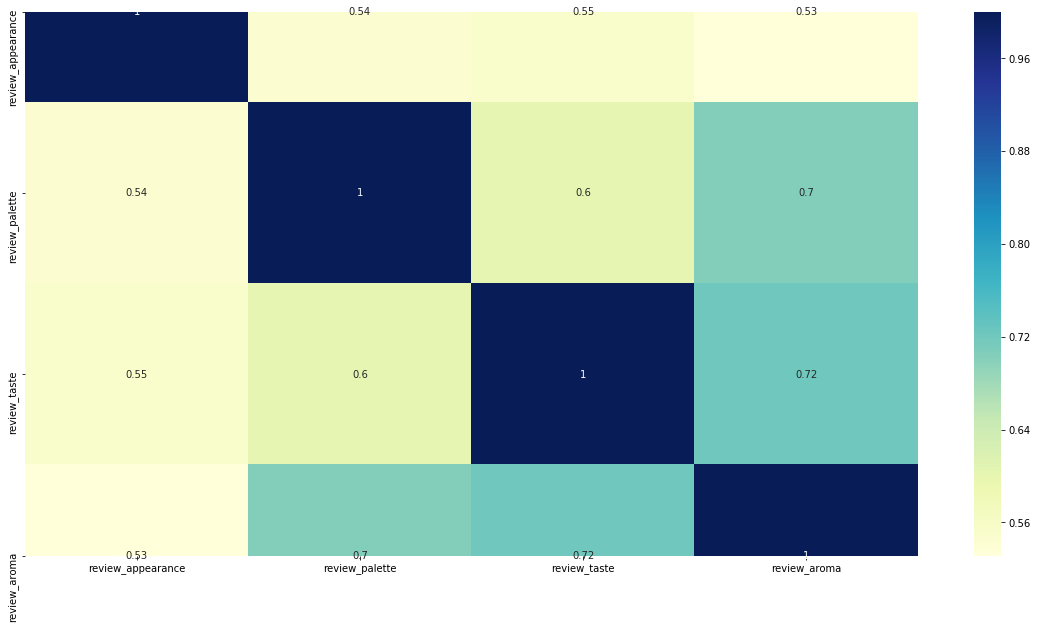

In [41]:
plt.figure(figsize = (20,10))  
sns.heatmap(x_train.corr(),annot = True,cmap="YlGnBu")

### Answer:

#### Review Palette and Review_Taste seems to be more important to user than appearance

In [42]:
y_train_price = lm.predict(x_train)


Text(0.5, 0, 'Errors')

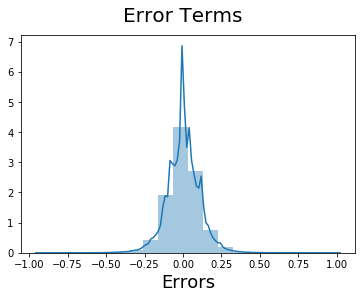

In [43]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [46]:
#sns.pairplot(df_q3)
#plt.show()

## Q4 - If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [65]:
filtered_df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'Review_Timestamp',
       'Year'],
      dtype='object')

In [67]:
idx = filtered_df.groupby(by=['review_palette','review_taste'])['review_overall'].idxmax()


In [71]:
q4_df = filtered_df.loc[idx,].sort_values(by='review_overall', ascending=False)

In [91]:
top_3_beers = q4_df[q4_df['review_overall'] > 4 ].groupby(['beer_beerId']).agg({'review_palette':'sum','review_taste':'sum'}).sort_values(by=['review_palette','review_taste'''], ascending=False).head(3)

In [101]:
a = top_3_beers.reset_index().beer_beerId

In [109]:
q4_final = q4_df[q4_df['beer_beerId'].isin(a)][['beer_beerId','beer_name','beer_style']]

In [113]:
q4_final.drop_duplicates()

,beer_beerId,beer_name,beer_style
1129,436,Amstel Light,Light Lager
179,25414,Caldera Pale Ale,American Pale Ale (APA)
8980,29687,Jefferson's Reserve Bourbon Barrel Stout,American Double / Imperial Stout


#### Answer : I would recommend the above beers to my friends

## NLP Based Recommendation Engine Code

In [47]:
beer_df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text',
       'Review_Timestamp'],
      dtype='object')

In [48]:
# Finding all beers with Null Description
beer_df[beer_df['review_text'].isnull() == True].head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,Review_Timestamp
3706,10.5,57110,14879,D.O.R.I.S. The Destroyer Double Imperial Stout,Russian Imperial Stout,5.0,4.5,4.5,4.0,Retail1LO,4.5,NaN,2011-08-08 23:52:00
5375,9.4,33644,14879,B.O.R.I.S. The Crusher Oatmeal-Imperial Stout,Russian Imperial Stout,5.0,5.0,4.5,4.5,corby112,5.0,NaN,2008-11-28 08:49:18
14804,9.5,25884,12224,aibo,Euro Strong Lager,3.0,3.5,4.0,3.0,Thanby,3.5,NaN,2007-09-02 23:19:35
17009,12.0,17538,1199,Founders Devil Dancer,American Double / Imperial IPA,4.5,5.0,4.5,4.0,Retail1LO,4.0,NaN,2011-07-30 19:05:07
17568,12.0,17538,1199,Founders Devil Dancer,American Double / Imperial IPA,4.5,4.5,5.0,5.0,corby112,5.0,NaN,2008-11-27 17:53:10


In [49]:
# Choosing Text Fields for NLP Processing
beer_descr = beer_df[~beer_df['review_text'].isnull()][['beer_name','beer_style','review_text']]

In [50]:
beer_descr.shape

(528751, 3)

In [51]:
beer_descr.head(10)

,beer_name,beer_style,review_text
0,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...
1,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ..."
2,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac..."
3,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit..."
4,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca..."
5,Caldera Ginger Beer,Herbed / Spiced Beer,Poured from the bottle into a Chimay goblet. A...
6,Caldera Ginger Beer,Herbed / Spiced Beer,"22 oz bottle from ""Lifesource"" Salem. $3.95 Ni..."
7,Caldera Ginger Beer,Herbed / Spiced Beer,"Bottle says ""Malt beverage brewed with Ginger ..."
8,Caldera Ginger Beer,Herbed / Spiced Beer,I'm not sure why I picked this up... I like gi...
9,Caldera Ginger Beer,Herbed / Spiced Beer,Poured from a 22oz bomber into my Drie Fontein...


In [52]:
# Initializing Stemmer for English Language
stemmer = SnowballStemmer("english")

In [53]:
beer_descr['stemmed'] = beer_descr.review_ text.map(lambda x: ' '.join([stemmer.stem(y) for y in x.split(' ')]))

In [54]:
beer_descr.head()

,beer_name,beer_style,review_text,stemmed
0,Sausa Weizen,Hefeweizen,A lot of foam. But a lot. In the smell some ba...,a lot of foam. but a lot. in the smell some ba...
1,Red Moon,English Strong Ale,"Dark red color, light beige foam, average. In ...","dark red color, light beig foam, average. in t..."
2,Black Horse Black Beer,Foreign / Export Stout,"Almost totally black. Beige foam, quite compac...","almost total black. beig foam, quit compact, n..."
3,Sausa Pils,German Pilsener,"Golden yellow color. White, compact foam, quit...","golden yellow color. white, compact foam, quit..."
4,Cauldron DIPA,American Double / Imperial IPA,"According to the website, the style for the Ca...","accord to the website, the style for the calde..."


In [55]:
# Using countVectorizer to count how many times each term shows up,
# tfidf transformer to generated weight matrix
cvec = CountVectorizer(
    stop_words = "english",
    min_df = 0.01,
    max_df = 0.60, # Optimization would be needed
    ngram_range = (1,2)
)

In [56]:
cvec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.6, max_features=None, min_df=0.01,
                ngram_range=(1, 2), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
cvec.fit(beer_descr['stemmed'])
list(islice(cvec.vocabulary_.items(),20))

[('lot', 618),
 ('foam', 401),
 ('smell', 930),
 ('banana', 73),
 ('tart', 1004),
 ('good', 439),
 ('start', 959),
 ('quit', 823),
 ('dark', 259),
 ('orang', 729),
 ('color', 219),
 ('live', 609),
 ('carbon', 169),
 ('taste', 1011),
 ('yeast', 1120),
 ('orang color', 730),
 ('red', 843),
 ('light', 586),
 ('beig', 97),
 ('average', 61)]

In [58]:
cvec_counts = cvec.transform(beer_descr['stemmed'])
print('sparse matrix shape', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('Sparsity : %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape (528751, 1126)
nonzero count: 25033466
Sparsity : 4.20%


In [59]:
# top 20 terms
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
count_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurances': occ})
count_df.sort_values(by='occurances', ascending=False).head(20)

,term,occurances
1065,veri,520121
688,nice,381381
627,malt,380889
516,hop,377226
986,sweet,368247
1005,tast,357839
586,light,341844
389,flavor,337974
439,good,336613
598,like,306905


In [60]:
# Using TfIdf Transformer to calculate weights
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)


In [62]:
# compute the similarity of a beer choice
idx = beer_descr.index.get_indexer_for((beer_descr[beer_descr['beer_style']=='Tripel'].index))[0]

In [63]:
sims = cosine_similarity(transformed_weights[idx,:],transformed_weights)

In [64]:
beer_descr['sims'] = sims.T
beer_descr.sort_values(by='sims', ascending=False)[['beer_name','beer_style','sims']].head(20)

,beer_name,beer_style,sims
1854,Dixie Crystal Beer,Tripel,1.000000
207462,Trippel Belgian Style Ale,Tripel,0.400943
170557,Arbor Brewing Phat Abbot Belgian Triple,Tripel,0.372985
373145,La Fin Du Monde,Tripel,0.362921
259444,The Ugly American,Tripel,0.355088
268022,Kerberos Tripel,Tripel,0.349870
385413,La Trappe Tripel (Koningshoeven / Dominus),Tripel,0.346235
373226,La Fin Du Monde,Tripel,0.346035
309220,Longshot Friar Hop Ale,Belgian IPA,0.338575
99013,St. Sebastiaan Golden,Tripel,0.335602


In [49]:
# Domain Assumption : Based on the Inputs from : https://www.thebeerstore.ca/beers/?beer_style=strong 
#              Strong
#              This is a broad grouping that can describe any beer over 7% ABV. 
#              Strong beers are typically dark in colour, some are almost black. 
#               Different styles can include old ales, double IPAs, and barleywines.